<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/bank_transaction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank-transaction-prediction

This is a machine learning progect

# Santander Customer Transaction Prediction
Identify who costumers will make a transaction

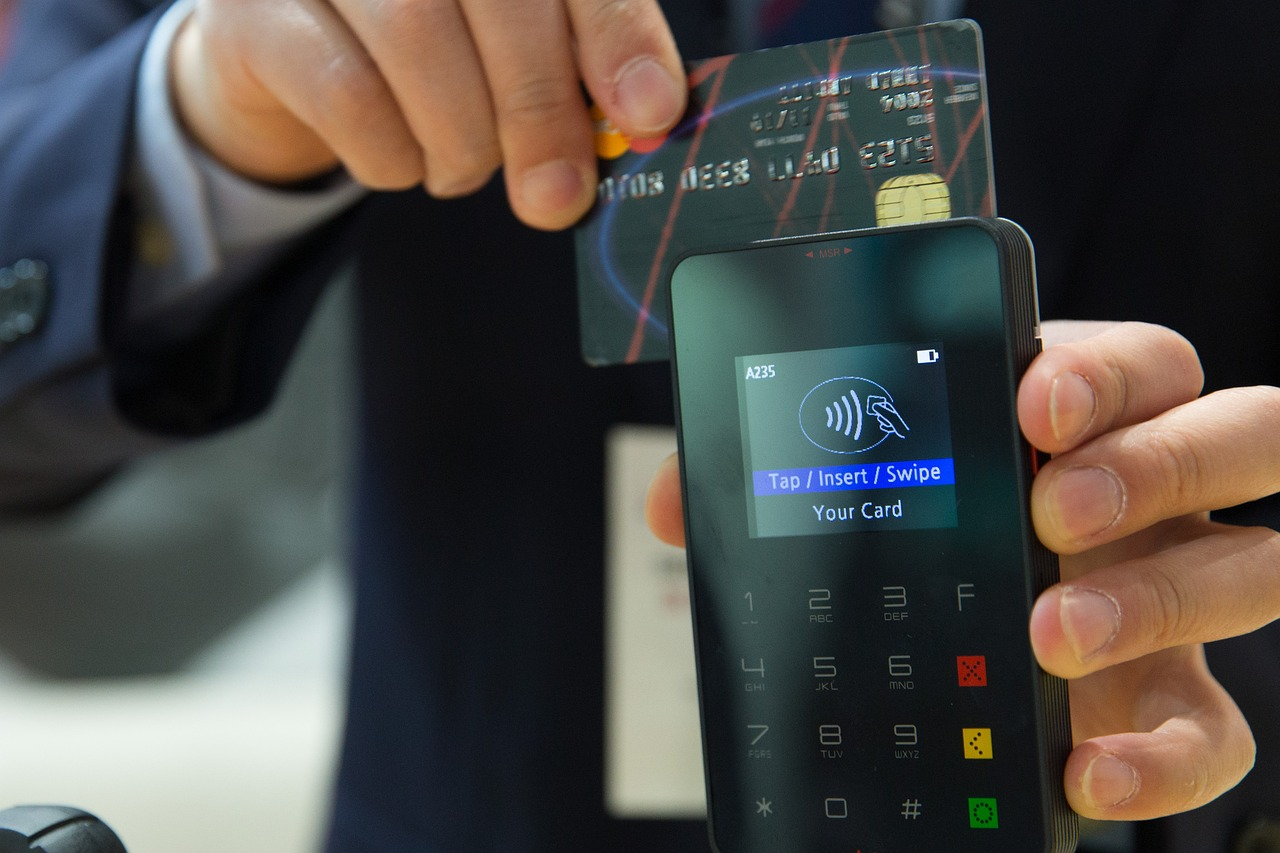

This is a dataset with the data provided by the Santander bank in Kaggles so that with machine leaning techniques it is possible to train a model that can predict and identify which clients will carry out a specific transaction in the future, regardless of the amount of money made.

This is so that Santander can more accurately identify new ways to solve our most common challenge: binary classification problems, such as: is the customer satisfied? Will a customer buy this product? Can a client repay this loan?

### Install Required Libraries

In [2]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [3]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


### Download Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import opendatasets as od
import pandas as pd
import csv

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/santander-customer-transaction-prediction/data'

In [6]:
od.download(dataset_url)

100%|██████████| 250M/250M [00:04<00:00, 59.9MB/s]



Extracting archive ./santander-customer-transaction-prediction/santander-customer-transaction-prediction.zip to ./santander-customer-transaction-prediction


In [7]:
data_dir = 'santander-customer-transaction-prediction'

### View Dataset Files
Let's look at the size, no. of lines and first few lines of each file

In [ ]:
!ls -lh {data_dir}

total 579M
-rw-r--r-- 1 root root 2.6M Oct 11 18:28 sample_submission.csv
-rw-r--r-- 1 root root 288M Oct 11 18:28 test.csv
-rw-r--r-- 1 root root 289M Oct 11 18:28 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

200001 santander-customer-transaction-prediction/train.csv


In [ ]:
!wc -l {data_dir}/test.csv

200001 santander-customer-transaction-prediction/test.csv


In [ ]:
!wc -l {data_dir}/sample_submission.csv

200001 santander-customer-transaction-prediction/sample_submission.csv


In [ ]:
!head {data_dir}/train.csv

ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136

In [ ]:
!head {data_dir}/test.csv

ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_13

In [ ]:
!head {data_dir}/sample_submission.csv

ID_code,target
test_0,0
test_1,0
test_2,0
test_3,0
test_4,0
test_5,0
test_6,0
test_7,0
test_8,0


### Describing dataset,observations
This is a classification problems Training data is 302.13 MB. Training data has 200k row. The test set has all columns except the target column. The submission file should contain the key and target for each test sample.

### Loading Training Set

In [8]:
train_banck_df = pd.read_csv('santander-customer-transaction-prediction/train.csv')
train_banck_df.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


### Load Test Set

In [9]:
test_bank_df = pd.read_csv('santander-customer-transaction-prediction/test.csv')
test_bank_df.head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


### Explore the Dataset

### Training Set

In [ ]:
train_banck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
train_banck_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


### Test Set

In [ ]:
test_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [ ]:
test_bank_df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


Here we tried to find if train_bank_df have some duplicated values.

In [10]:
def get_unique(name,data_series):
    print("{} has total {} records and {} are unique.".format(name,len(data_series),len(data_series.unique())))

In [11]:
get_unique('train_bank_df', train_banck_df['ID_code'])

train_bank_df has total 200000 records and 200000 are unique.


As we can see there are no duplicate values

### Exploratory Data Analysis and Visualization


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
train_banck_df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [ ]:
features = train_banck_df.columns.tolist()
features_v = np.random.choice(features, size=20, replace=False).tolist()

<Axes: title={'center': ' Distribution of average of values of train data and test data '}, ylabel='Count'>

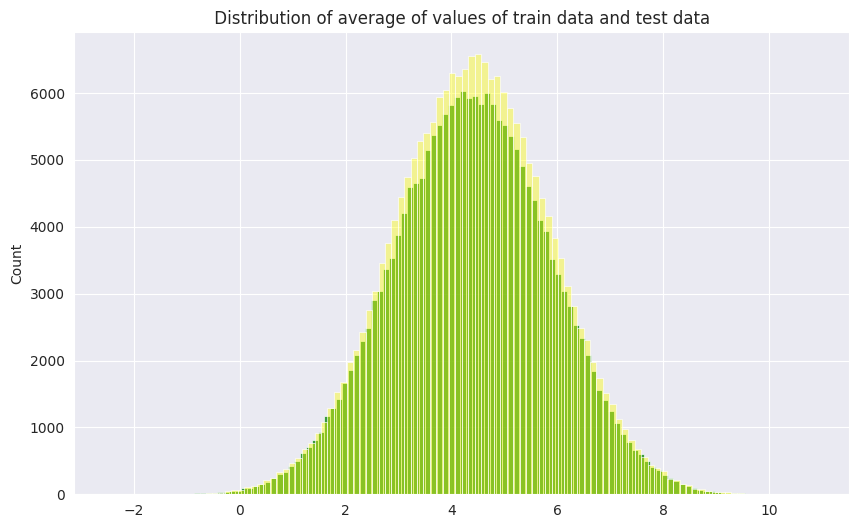

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(' Distribution of average of values of train data and test data ')
sns.histplot(train_banck_df[features_v].mean(axis=1), color='green', bins=110, label='train data')
sns.histplot(test_bank_df[features_v].mean(axis=1), color= 'yellow', alpha=0.4, bins=110, label='test data')

<ipython-input-52-d0e229760415>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.histplot(train_banck_df.mean(axis=0), color='blue', bins=120, kde=True, label='train data')
<ipython-input-52-d0e229760415>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.histplot(test_bank_df.mean(axis=0), color= 'magenta', kde=True, bins=120, label='test data')


<Axes: title={'center': ' Distribution of average of values of train data and test data '}, ylabel='Count'>

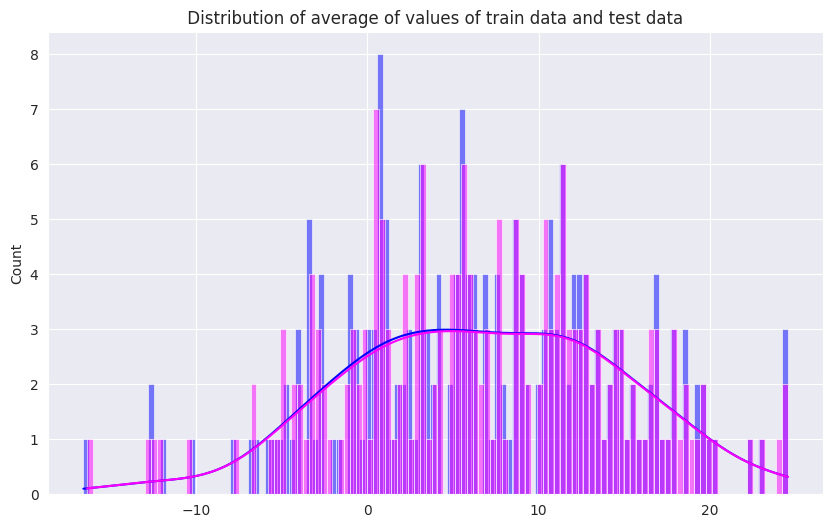

In [ ]:
plt.figure(figsize=(10, 6))
plt.title(' Distribution of average of values of train data and test data ')
sns.histplot(train_banck_df.mean(axis=0), color='blue', bins=120, kde=True, label='train data')
sns.histplot(test_bank_df.mean(axis=0), color= 'magenta', kde=True, bins=120, label='test data')

In [ ]:
test_bank_df.corr()

<ipython-input-53-8a9d162c81b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_bank_df.corr()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,0.004234,0.002625,0.000847,-0.004252,0.002274,0.001930,-0.004654,-0.003669,0.001427,...,0.002662,0.001151,0.001102,0.002756,-0.003509,0.001446,-0.000754,-0.000382,-0.004068,0.001248
var_1,0.004234,1.000000,0.002912,-0.002148,0.000716,0.001393,0.003567,0.003024,0.000778,-0.002643,...,0.002032,0.003477,-0.003454,0.000345,0.000126,0.001339,-0.001627,-0.002839,-0.003024,0.001861
var_2,0.002625,0.002912,1.000000,-0.005882,0.003657,0.000283,-0.001141,-0.000273,0.001231,0.000041,...,-0.001765,0.001144,-0.005496,0.002027,-0.002396,0.001333,-0.002400,-0.002726,-0.001537,0.000229
var_3,0.000847,-0.002148,-0.005882,1.000000,-0.000959,0.001644,-0.003074,0.001945,-0.001443,-0.001291,...,-0.001630,0.002119,0.001269,-0.006136,0.000289,0.001601,0.003177,0.002780,-0.002625,-0.003034
var_4,-0.004252,0.000716,0.003657,-0.000959,1.000000,0.004822,-0.003284,-0.000167,0.003138,0.000093,...,-0.003106,0.002473,-0.000734,-0.000754,-0.000427,0.003046,-0.001317,0.000425,-0.002146,0.000401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.001446,0.001339,0.001333,0.001601,0.003046,0.002676,0.000980,0.004812,-0.003241,-0.002854,...,0.000899,-0.003857,0.000587,0.001951,0.000501,1.000000,-0.001346,-0.000669,0.003914,-0.003148
var_196,-0.000754,-0.001627,-0.002400,0.003177,-0.001317,-0.002445,-0.001602,0.001645,0.002765,0.001325,...,0.000326,0.003158,-0.001467,-0.000119,-0.000542,-0.001346,1.000000,0.002297,0.003347,0.002055
var_197,-0.000382,-0.002839,-0.002726,0.002780,0.000425,-0.003665,-0.003378,0.001451,-0.002954,0.002241,...,-0.002662,-0.001184,0.002277,0.000483,-0.002226,-0.000669,0.002297,1.000000,-0.002171,0.003360
var_198,-0.004068,-0.003024,-0.001537,-0.002625,-0.002146,-0.004626,0.000943,-0.000810,-0.001544,-0.002259,...,0.000263,-0.003148,0.000584,0.000559,-0.002761,0.003914,0.003347,-0.002171,1.000000,-0.000834


In [ ]:
sample_corr_test_bank = test_bank_df[['var_0'	,'var_1',	'var_2'	,'var_3',	'var_4'	,'var_5'	,'var_6',	'var_7',	'var_8',	'var_9'	,'var_10']].corr()
sample_corr_test_bank

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
var_0,1.000000,0.004234,0.002625,0.000847,-0.004252,0.002274,0.001930,-0.004654,-0.003669,0.001427,0.003139
var_1,0.004234,1.000000,0.002912,-0.002148,0.000716,0.001393,0.003567,0.003024,0.000778,-0.002643,-0.001371
var_2,0.002625,0.002912,1.000000,-0.005882,0.003657,0.000283,-0.001141,-0.000273,0.001231,0.000041,0.004215
var_3,0.000847,-0.002148,-0.005882,1.000000,-0.000959,0.001644,-0.003074,0.001945,-0.001443,-0.001291,-0.000787
var_4,-0.004252,0.000716,0.003657,-0.000959,1.000000,0.004822,-0.003284,-0.000167,0.003138,0.000093,-0.001197
var_5,0.002274,0.001393,0.000283,0.001644,0.004822,1.000000,-0.003555,0.002837,0.001955,0.002249,0.001320
var_6,0.001930,0.003567,-0.001141,-0.003074,-0.003284,-0.003555,1.000000,0.001845,0.002115,-0.001948,0.005244
var_7,-0.004654,0.003024,-0.000273,0.001945,-0.000167,0.002837,0.001845,1.000000,-0.000650,0.002839,-0.000322
var_8,-0.003669,0.000778,0.001231,-0.001443,0.003138,0.001955,0.002115,-0.000650,1.000000,-0.002118,0.001016
var_9,0.001427,-0.002643,0.000041,-0.001291,0.000093,0.002249,-0.001948,0.002839,-0.002118,1.000000,0.000603


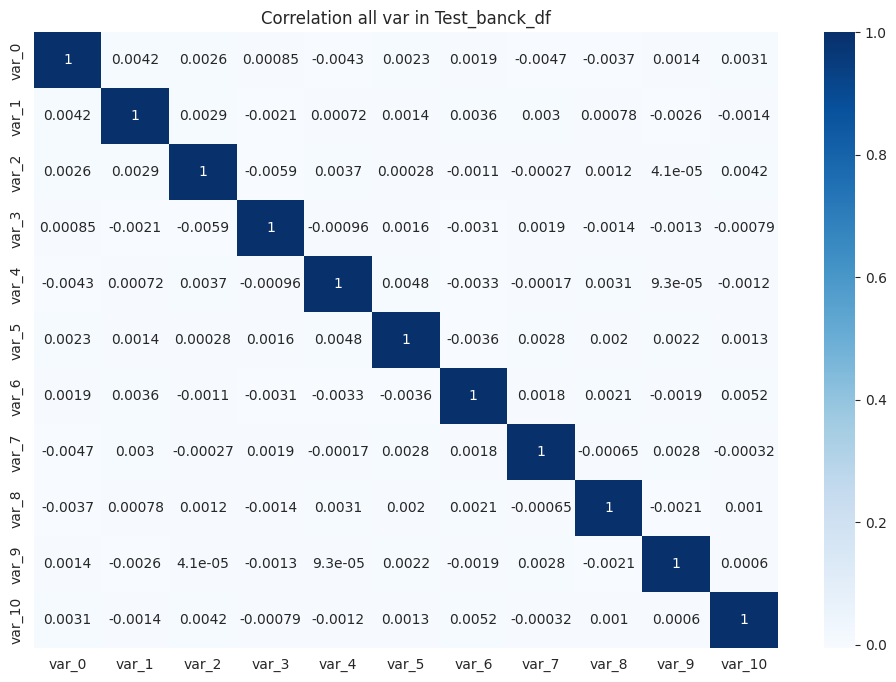

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Correlation all var in Test_banck_df')
sns.heatmap(sample_corr_test_bank, annot=True, cmap='Blues');

In [ ]:
test_matrix_corr = train_banck_df[features_v +['target']].corr()
test_matrix_corr

,var_118,var_47,var_54,var_90,var_92,var_12,var_23,var_151,var_157,var_86,...,var_135,var_197,var_85,var_32,var_6,var_125,var_15,var_120,var_95,target
var_118,1.000000,0.000234,0.001521,0.003083,-0.002604,-0.002140,-0.002826,-0.002375,0.003605,0.000562,...,0.002126,-0.002194,0.000486,0.003515,0.003445,0.004249,0.001923,0.000070,0.003909,0.040358
var_47,0.000234,1.000000,-0.002803,-0.000338,0.002342,-0.003232,0.000289,-0.001723,0.002524,0.003227,...,-0.000699,-0.002613,0.001000,0.004711,0.001574,-0.001866,0.002198,-0.000032,0.000011,0.008983
var_54,0.001521,-0.002803,1.000000,-0.001736,-0.000346,0.003102,-0.000631,0.002298,-0.000809,0.000091,...,-0.004967,-0.003952,-0.003525,-0.000859,-0.001913,-0.001457,0.002618,0.005970,-0.000553,-0.015796
var_90,0.003083,-0.000338,-0.001736,1.000000,-0.002363,-0.004556,0.000905,0.000430,0.001813,-0.003780,...,0.003150,0.000707,-0.002715,0.001549,0.005135,0.003263,-0.001809,0.002476,0.005671,0.029395
var_92,-0.002604,0.002342,-0.000346,-0.002363,1.000000,0.006284,-0.000733,-0.000888,-0.003281,0.004712,...,0.002266,0.000852,-0.000111,0.005384,-0.004714,-0.002917,-0.001842,-0.000062,0.002684,-0.046295
var_12,-0.002140,-0.003232,0.003102,-0.004556,0.006284,1.000000,-0.000534,-0.003752,-0.003366,0.002348,...,-0.002979,0.002946,0.002043,-0.006936,-0.003376,-0.002220,-0.005656,0.001397,-0.003500,-0.069489
var_23,-0.002826,0.000289,-0.000631,0.000905,-0.000733,-0.000534,1.000000,-0.000321,-0.000295,0.002098,...,0.004568,-0.001586,0.000734,-0.001484,-0.003764,-0.003314,0.003355,-0.003277,-0.003497,-0.025473
var_151,-0.002375,-0.001723,0.002298,0.000430,-0.000888,-0.003752,-0.000321,1.000000,0.001362,-0.003596,...,-0.000218,-0.000263,-0.000026,0.002551,0.002930,-0.003781,0.000108,-0.000177,0.004363,0.027524
var_157,0.003605,0.002524,-0.000809,0.001813,-0.003281,-0.003366,-0.000295,0.001362,1.000000,-0.000941,...,-0.002003,0.001637,-0.002911,0.002713,0.008076,-0.000080,-0.000605,-0.001267,-0.000349,0.032642
var_86,0.000562,0.003227,0.000091,-0.003780,0.004712,0.002348,0.002098,-0.003596,-0.000941,1.000000,...,-0.004859,0.002668,0.002605,-0.003141,-0.005616,-0.001072,0.002454,0.004757,-0.002580,-0.039126


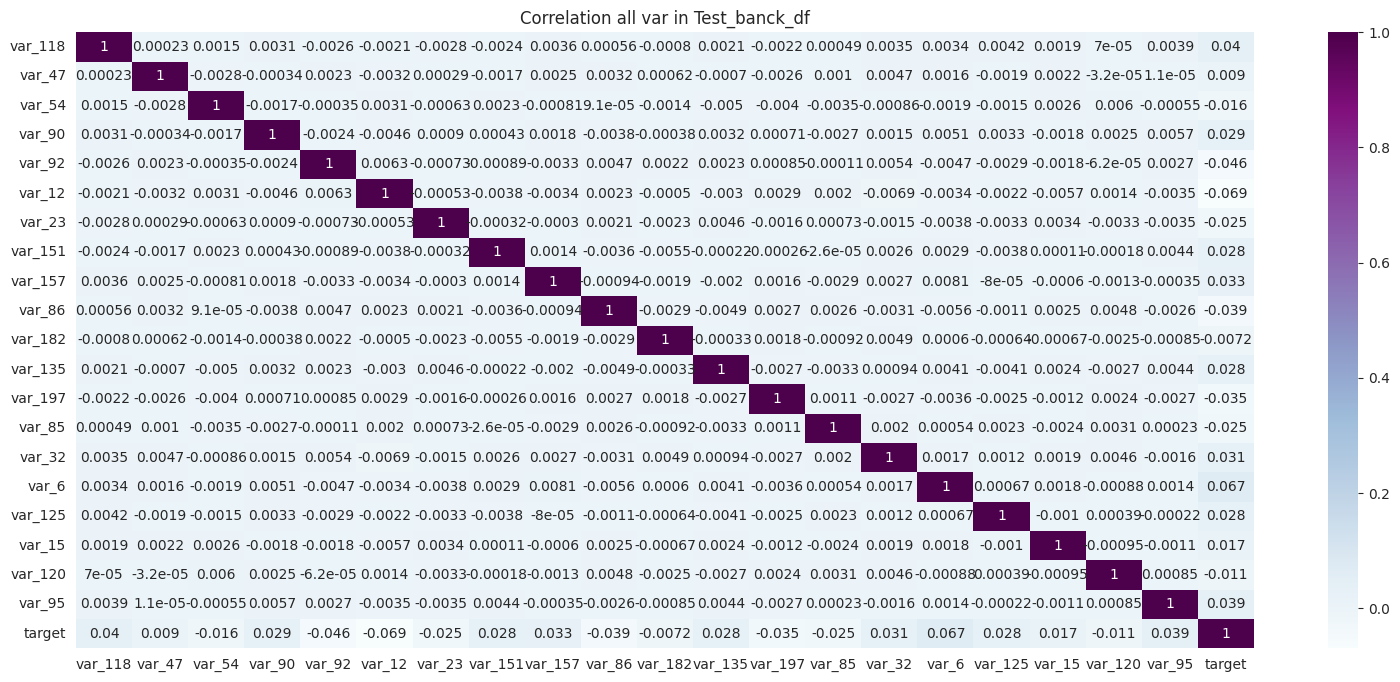

In [ ]:
plt.figure(figsize=(19,8))
plt.title('Correlation all var in Test_banck_df')
sns.heatmap(test_matrix_corr, annot=True, cmap='BuPu');

Handle missing, incorrect and invalid data

In [13]:
(train_banck_df.isnull().sum()/len(train_banck_df))*100

ID_code    0.0
target     0.0
var_0      0.0
var_1      0.0
var_2      0.0
          ... 
var_195    0.0
var_196    0.0
var_197    0.0
var_198    0.0
var_199    0.0
Length: 202, dtype: float64

In [14]:
test_bank_df.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)



### Extract Inputs and Outputs

In [ ]:
train_banck_df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [15]:
input_cols = list(train_banck_df.columns)[2:-1]
input_cols

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [16]:
target_col = ['target']
target_col

['target']

### Training

In [17]:
train_inputs = train_banck_df[input_cols].copy()
train_targets = train_banck_df[target_col].copy()

In [ ]:
train_inputs

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,-0.1162,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,2.3425,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,0.3243,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289


In [ ]:
train_targets

,target
0,0
1,0
2,0
3,0
4,0
...,...
199995,0
199996,0
199997,0
199998,0


### Test

In [18]:
test_inputs = test_bank_df[input_cols].copy()

In [ ]:
test_inputs

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,...,1.0903,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102
199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,...,1.7106,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740
199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,...,-1.0926,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905
199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,...,0.8885,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735


Idenfy the numeric columns

In [19]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numeric_cols

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

### Scale Numeric Values
Let's scale numeric values to the 0 to 1 range.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [22]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] =scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe

<bound method NDFrame.describe of            var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0       0.427853  0.324824  0.568059  0.388041  0.550670  0.467321  0.454298   
1       0.557212  0.428639  0.681235  0.410417  0.628408  0.795072  0.536604   
2       0.411969  0.483777  0.578061  0.599690  0.474941  0.471329  0.753295   
3       0.535099  0.507140  0.396562  0.546993  0.647586  0.616822  0.572995   
4       0.473637  0.533434  0.624133  0.504796  0.621079  0.702836  0.589011   
...          ...       ...       ...       ...       ...       ...       ...   
199995  0.556579  0.572293  0.356529  0.268693  0.454064  0.886709  0.544817   
199996  0.226382  0.495472  0.846379  0.504570  0.278944  0.441637  0.579126   
199997  0.543277  0.393057  0.487100  0.429814  0.367884  0.545106  0.361976   
199998  0.467503  0.253090  0.666823  0.440957  0.641783  0.664399  0.606616   
199999  0.525846  0.367145  0.580254  0.610273  0.559035  0.660683  0.481378   

     

In [ ]:
test_inputs[numeric_cols].describe

<bound method NDFrame.describe of            var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0       0.535360  0.897837  0.628717  0.715833  0.548256  0.605894  0.574061   
1       0.408005  0.641132  0.533050  0.395056  0.355501  0.573148  0.601977   
2       0.254905  0.184314  0.465517  0.535820  0.447373  0.850517  0.417628   
3       0.408357  0.539775  0.574667  0.500064  0.325182  0.717406  0.424956   
4       0.567520  0.586569  0.696941  0.588941  0.347404  0.481345  0.739656   
...          ...       ...       ...       ...       ...       ...       ...   
199995  0.640963  0.631663  0.482493  0.517058  0.303761  0.570088  0.411547   
199996  0.467619  0.231989  0.303274  0.694130  0.674232  0.714288  0.547751   
199997  0.564014  0.681360  0.527405  0.590022  0.655778  0.880974  0.498492   
199998  0.661394  0.571593  0.669608  0.568900  0.530267  0.426764  0.303029   
199999  0.505260  0.662874  0.470564  0.461549  0.426935  0.675340  0.416464   

     

### Spliting of the data sets and createtraining and validation set
We'll set aside 25% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_val, train_targets, val_targets = train_test_split(train_inputs, train_targets, test_size=0.25, random_state=42)

In [ ]:
x_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198
21743,0.421508,0.783574,0.565865,0.584397,0.574608,0.468206,0.441020,0.205267,0.646025,0.493879,...,0.531343,0.498663,0.687709,0.227668,0.502421,0.609912,0.472357,0.110792,0.485794,0.461997
124554,0.632022,0.447687,0.435852,0.452236,0.563294,0.386809,0.546604,0.553153,0.252217,0.830559,...,0.520217,0.705190,0.565802,0.570104,0.526206,0.551268,0.431366,0.313466,0.200354,0.692848
10351,0.623637,0.728303,0.181302,0.607900,0.480650,0.607813,0.552292,0.486969,0.650188,0.501957,...,0.359875,0.438416,0.651029,0.465887,0.495892,0.553841,0.483611,0.671493,0.389318,0.401106
135164,0.680885,0.426964,0.484669,0.439914,0.575065,0.450534,0.486657,0.631145,0.390511,0.646453,...,0.702857,0.353416,0.617100,0.634793,0.324462,0.734554,0.625106,0.112935,0.511457,0.274811
49969,0.322868,0.654696,0.646523,0.508440,0.574737,0.652984,0.484263,0.560493,0.627895,0.279035,...,0.615051,0.511576,0.449161,0.453544,0.375444,0.567125,0.204921,0.716948,0.655601,0.646953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.553947,0.675325,0.437059,0.637827,0.661565,0.218626,0.413776,0.277445,0.758215,0.742135,...,0.481741,0.405960,0.426243,0.583028,0.546383,0.535213,0.427055,0.480829,0.491357,0.401379
103694,0.435644,0.573792,0.586868,0.415973,0.421192,0.350709,0.280785,0.378841,0.574668,0.486233,...,0.459945,0.464247,0.571032,0.411299,0.559867,0.692041,0.457347,0.581766,0.360310,0.393548
131932,0.822220,0.631423,0.470767,0.639846,0.372057,0.733263,0.472789,0.356605,0.355588,0.608292,...,0.479069,0.665251,0.602106,0.529390,0.443802,0.454181,0.810749,0.617314,0.331501,0.359630
146867,0.480700,0.884785,0.625711,0.677885,0.399151,0.429964,0.132139,0.685334,0.726211,0.637150,...,0.513251,0.815397,0.499737,0.390230,0.587856,0.572261,0.407651,0.317075,0.347992,0.761363


In [ ]:
train_targets

,target
21743,0
124554,0
10351,0
135164,0
49969,0
...,...
119879,0
103694,0
131932,0
146867,0


In [ ]:
x_val

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198
119737,0.532256,0.414662,0.403176,0.489209,0.485599,0.346827,0.455052,0.511939,0.711088,0.617679,...,0.309878,0.407980,0.309158,0.568909,0.561423,0.573015,0.532930,0.616435,0.475877,0.543322
72272,0.624863,0.348487,0.276330,0.155467,0.666144,0.860010,0.339617,0.462996,0.475713,0.687525,...,0.697696,0.468581,0.339733,0.693801,0.644829,0.205143,0.519966,0.306679,0.626676,0.431470
158154,0.641712,0.558965,0.658614,0.298310,0.735009,0.746978,0.593174,0.837253,0.696129,0.510369,...,0.412073,0.521513,0.442370,0.382012,0.682650,0.414346,0.643546,0.653227,0.444021,0.728592
65426,0.392071,0.640211,0.523866,0.717587,0.443182,0.734815,0.500229,0.675988,0.522685,0.326151,...,0.544806,0.632212,0.434656,0.491549,0.593660,0.116978,0.335057,0.193313,0.511871,0.549763
30074,0.259195,0.774144,0.761080,0.235250,0.581464,0.351554,0.243984,0.298414,0.668313,0.328073,...,0.599235,0.561652,0.427809,0.299454,0.495071,0.454150,0.445662,0.236475,0.333885,0.618080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118344,0.534320,0.443336,0.305885,0.584322,0.759464,0.603105,0.369271,0.516384,0.525740,0.407766,...,0.489846,0.365219,0.323173,0.690486,0.582098,0.471541,0.714062,0.280316,0.665883,0.495703
166238,0.452579,0.624889,0.554285,0.385992,0.479917,0.565796,0.784768,0.749934,0.470112,0.417223,...,0.647350,0.654631,0.648597,0.618422,0.659214,0.345522,0.502418,0.581259,0.323024,0.399074
135178,0.773733,0.636392,0.747190,0.498719,0.441569,0.582760,0.238247,0.244382,0.469623,0.712734,...,0.515512,0.449754,0.655419,0.421916,0.401883,0.498945,0.511113,0.468100,0.711779,0.544277
147182,0.451760,0.580338,0.584611,0.856212,0.351525,0.418714,0.619730,0.234360,0.353143,0.196529,...,0.721875,0.491852,0.554343,0.338302,0.477296,0.416665,0.297884,0.376710,0.648879,0.464135


In [ ]:
val_targets

,target
119737,0
72272,0
158154,0
65426,0
30074,1
...,...
118344,0
166238,0
135178,0
147182,0


### Training and Tuning Different Model

### Logistic Regression Model
We will use Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression().fit(x_train, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
model.fit(x_train, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
from sklearn.metrics import mean_squared_error

Let's find error on the train data

In [30]:
model_train_preds = model.predict(x_train)
model_train_rmse = mean_squared_error(train_targets, model_train_preds, squared=False)
model_val_preds = model.predict(x_val)
model_val_rmse = mean_squared_error(val_targets, model_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model_train_rmse, model_val_rmse))

Train RMSE: 0.2917533204609675, Validation RMSE: 0.2946862738574703


In [31]:
accuracy_train_model = model.score(x_train,train_targets)
accuracy_val_model = model.score(x_val,val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model*100,accuracy_val_model*100))

 The accuracy for training set by tree is 91.4880% and 
 for validation set is 91.3160%


In [32]:
model = LogisticRegression(solver='liblinear', random_state=42).fit(x_train, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Let's find error on the train data

In [33]:
model0_train_preds = model.predict(x_train)
model0_train_rmse = mean_squared_error(train_targets, model0_train_preds, squared=False)
model0_val_preds = model.predict(x_val)
model0_val_rmse = mean_squared_error(val_targets, model0_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model0_train_rmse, model0_val_rmse))

Train RMSE: 0.29165047574108294, Validation RMSE: 0.2948219801846531


In [34]:
accuracy_train_model0 = model.score(x_train,train_targets)
accuracy_val_model0 = model.score(x_val,val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model*100,accuracy_val_model*100))

 The accuracy for training set by tree is 91.4880% and 
 for validation set is 91.3160%


In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 91.49%


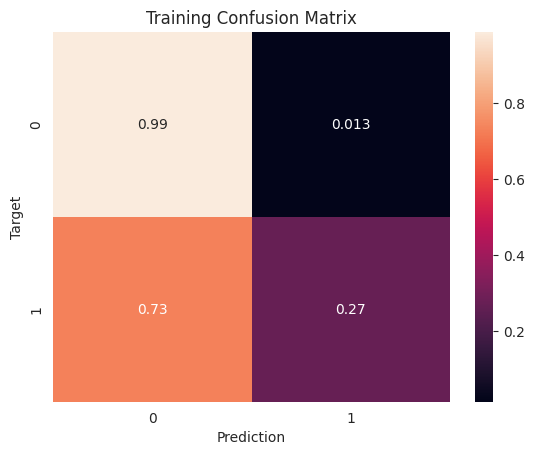

In [ ]:
model_train_preds = predict_and_plot(x_train, train_targets, 'Training')

Accuracy: 91.31%


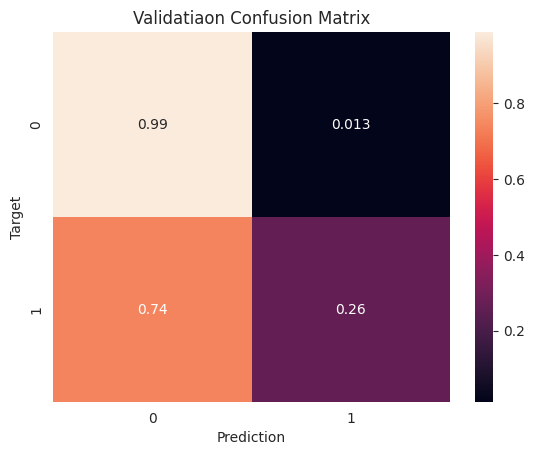

In [ ]:
model_val_preds = predict_and_plot(x_val, val_targets, 'Validatiaon')

### DecisionTreeClassifier Model
We will use DecisionTreeClassifier as the second model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(x_train, train_targets)

DecisionTreeClassifier(random_state=42)

### Evaluation
Let's evaluate the decision tree using the accuracy score and make predictions on the training

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
model1.score(x_train, train_targets) , model1.score(x_val, val_targets)

(1.0, 0.83246)

We are to generate predictions on the training and validation sets using the trained decision tree, and compute the RMSE loss.

In [39]:
model1_train_preds = model1.predict(x_train)
model1_train_preds

array([0, 0, 0, ..., 0, 0, 0])

checking the error on the validation data

In [40]:
model1_train_rmse = mean_squared_error(train_targets, model1_train_preds, squared=False)
print('The RMSE loss for the training data is {}'.format(model1_train_rmse))

The RMSE loss for the training data is 0.0


making predictions in the validation data

In [41]:
model1_val_preds = model1.predict(x_val)
model1_val_preds

array([0, 1, 0, ..., 0, 0, 0])

checking the error on the validation data

In [42]:
model1_val_rmse = mean_squared_error(val_targets, model1_val_preds, squared=False)
print('The RMSE loss for the validation data is {}'.format(model1_val_rmse))

The RMSE loss for the validation data is 0.40931650345423404


finding the feature importance

In [ ]:
model1_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)
model1_importance_df.head(10)

,feature,importance
81,var_81,0.014981
12,var_12,0.013622
53,var_53,0.011176
146,var_146,0.010397
110,var_110,0.010259
139,var_139,0.009937
99,var_99,0.009568
26,var_26,0.009366
6,var_6,0.009217
22,var_22,0.009096


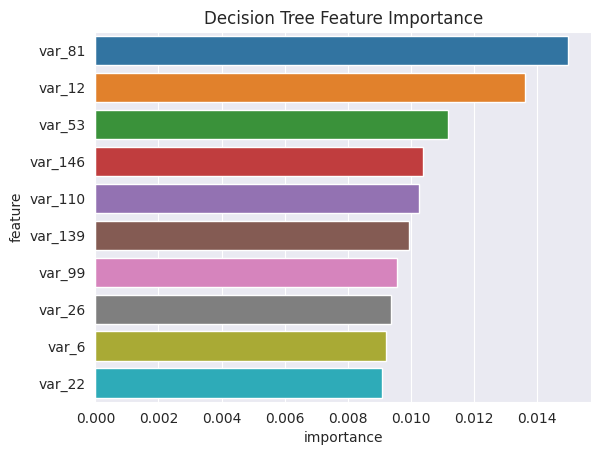

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=model1_importance_df.head(10), x='importance', y='feature');

### Hyper-Parameter Tuning
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.
A hyperparameter is a parameter whose value is used to control the learning process.

I will be using parameters such as: max_depth



In [ ]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params).fit(x_train, train_targets)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return train_rmse, val_rmse

funcition to plot the training and validation error for the passed parameters
using the test_params to find the training and validation error

In [ ]:
def test_param_and_plot(param_name, param_values):
  train_errors, val_errors = [], []
  for value in param_values:
    params = {param_name: value}
    train_rmse, val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve:' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])

#### n_estimators

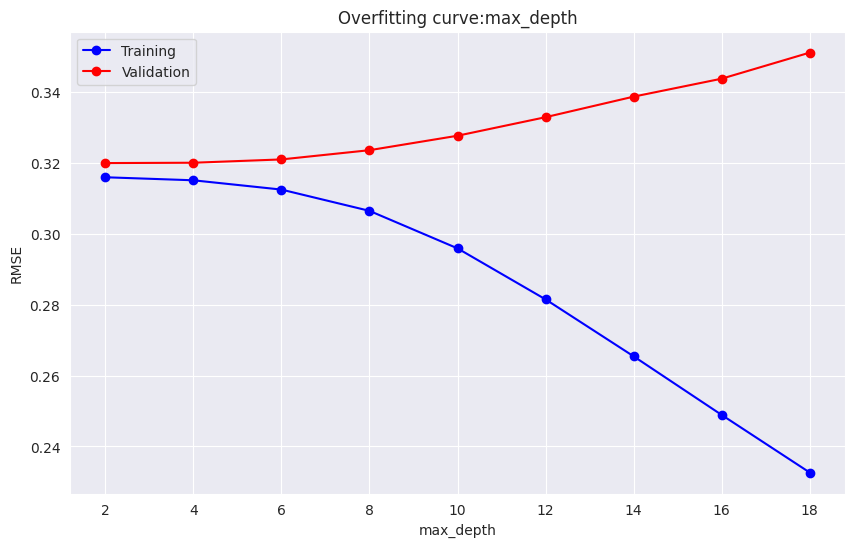

In [ ]:
test_param_and_plot('max_depth', range(2, 20, 2))

In [43]:
model1 = DecisionTreeClassifier(random_state=42, max_depth=6)
model1.fit(x_train, train_targets)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [44]:
model1.score(x_train, train_targets) , model1.score(x_val, val_targets)

(0.9023333333333333, 0.89694)

In [45]:
model1_val_rmse = mean_squared_error(val_targets, model1_val_preds, squared=False)
print('The RMSE loss for the validation data is {}'.format(model1_val_rmse))

The RMSE loss for the validation data is 0.40931650345423404


Generate predictions on the training and validation sets using the trained decision tree

In [ ]:
from sklearn.metrics import mean_squared_error

In [46]:
model11_train_preds = model1.predict(x_train)

In [47]:
model11_train_rmse = mean_squared_error(train_targets, model11_train_preds, squared=False)

In [48]:
model11_val_preds = model1.predict(x_val)

In [49]:
model11_val_rmse = mean_squared_error(val_targets, model11_val_preds, squared=False)

In [50]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model11_train_rmse, model11_val_rmse))

Train RMSE: 0.31251666622224594, Validation RMSE: 0.32102959365142647


### Randon Forest Regression
we'll train a random forest regressor using the training set.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model02 = RandomForestClassifier(n_jobs=-1, random_state=42)
model02.fit(x_train, train_targets.values.ravel())

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model02_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model02.feature_importances_
}).sort_values('importance', ascending=False)

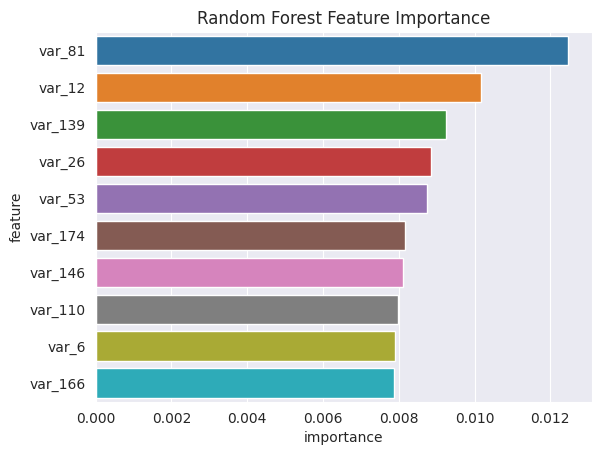

In [ ]:
plt.title('Random Forest Feature Importance')
sns.barplot(data=model02_importance_df.head(10), x='importance', y='feature');

### Make predictions using the Random forest regressor.

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
model02.score(x_train, train_targets) , model02.score(x_val, val_targets)

(0.9999933333333333, 0.89764)

In [56]:
model02_train_preds = model02.predict(x_train)

In [57]:
model02_train_rmse = mean_squared_error(train_targets, model02_train_preds, squared=False)

In [58]:
model02_val_preds = model02.predict(x_val)


In [59]:
model02_val_rmse = mean_squared_error(val_targets, model02_val_preds, squared=False)

In [60]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model02_train_rmse, model02_val_rmse))

Train RMSE: 0.0025819888974716113, Validation RMSE: 0.319937493895292


### Hyperparameter Tuning
I will be using few parameters such as:

* max_depth
* n_estimators
* min_samples_leaf
* min_samples_split

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, train_targets.values.ravel())
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values):
  train_errors, val_errors = [], []
  for value in param_values:
    params = {param_name: value}
    train_rmse, val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve:' + param_name)
  plt.plot(param_values, train_errors, 'b-o')
  plt.plot(param_values, val_errors, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training', 'Validation'])

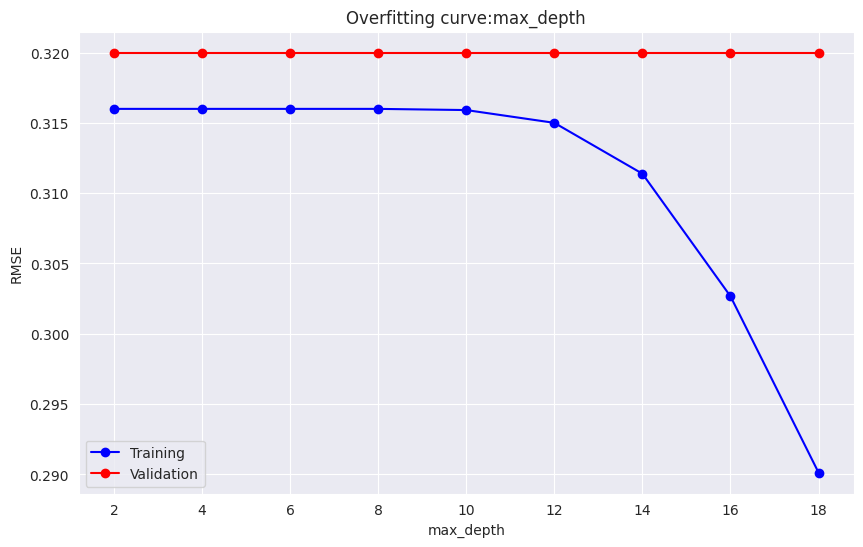

In [ ]:
test_param_and_plot('max_depth', range(2, 20, 2))

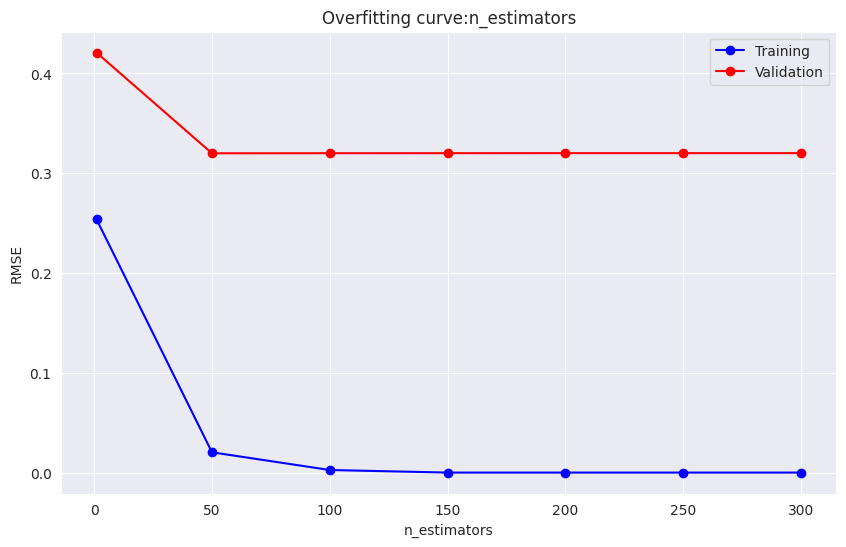

In [ ]:
test_param_and_plot('n_estimators', [1, 50, 100, 150, 200, 250, 300])

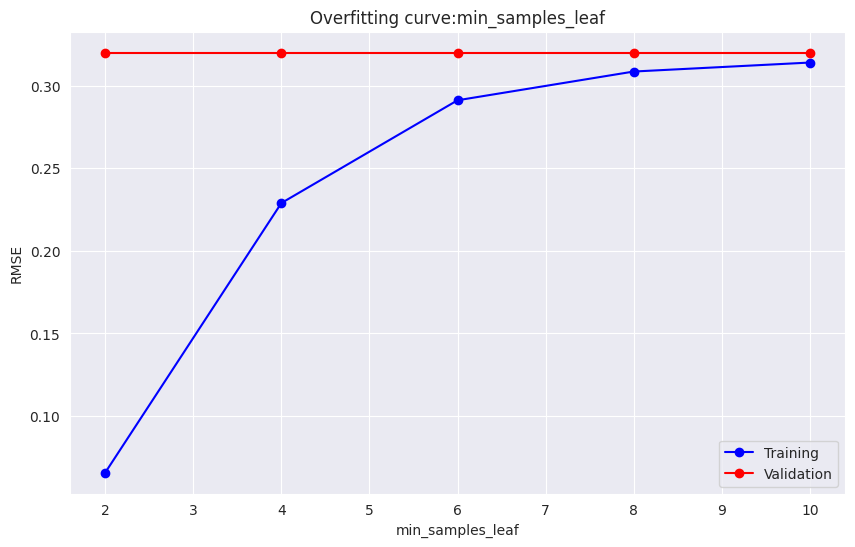

In [ ]:
test_param_and_plot('min_samples_leaf', [2,4,6,8,10])

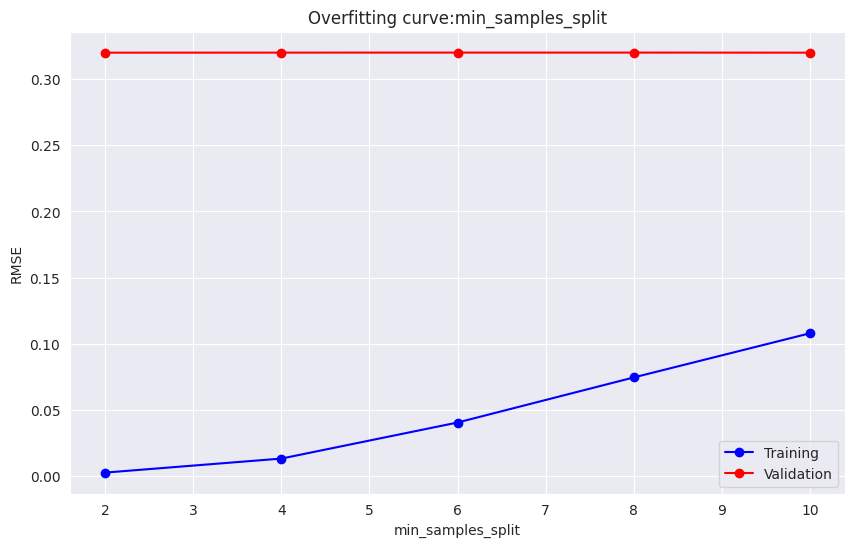

In [ ]:
test_param_and_plot('min_samples_split',[2,4,6,8,10] )

### Training the Model with the best parameters

In [61]:
model02 = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators = 250, min_samples_split = 10, min_samples_leaf= 8, max_features = 'sqrt', max_depth= 10, bootstrap=False)
model02.fit(x_train, train_targets.values.ravel())

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=8,
                       min_samples_split=10, n_estimators=250, n_jobs=-1,
                       random_state=42)

In [66]:
model022_train_preds = model02.predict(x_train)
model022_train_rmse = mean_squared_error(train_targets, model02_train_preds, squared=False)
model022_val_preds = model02.predict(x_val)
model022_val_rmse = mean_squared_error(val_targets, model02_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model022_train_rmse, model022_val_rmse))

Train RMSE: 0.0025819888974716113, Validation RMSE: 0.319937493895292


In [67]:
accuracy_train_model022 = model02.score(x_train,train_targets)
accuracy_val_model022 = model02.score(x_val,val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model022*100,accuracy_val_model022*100))

 The accuracy for training set by tree is 90.0213% and 
 for validation set is 89.7600%


### GradientBoostingClassifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
model03 = GradientBoostingClassifier(random_state=42)
model03.fit(x_train, train_targets.values.ravel())

GradientBoostingClassifier(random_state=42)

In [72]:
model03_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model03.feature_importances_
}).sort_values('importance', ascending=False)

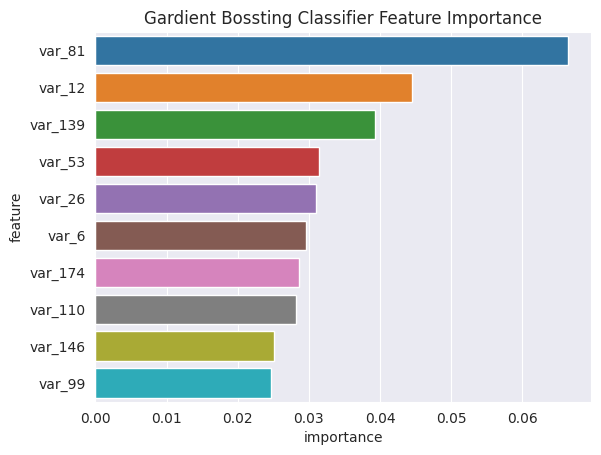

In [93]:
plt.title('Gardient Bossting Classifier Feature Importance')
sns.barplot(data=model03_importance_df.head(10), x='importance', y='feature');

### Make predictions using the GradientBoostingClassifier.

In [74]:
model03_train_preds = model03.predict(x_train)

In [75]:
model03_train_rmse = mean_squared_error(train_targets, model03_train_preds, squared=False)

In [76]:
model03_val_preds = model03.predict(x_val)

In [77]:
model03_val_rmse = mean_squared_error(val_targets, model03_val_preds, squared=False)

In [79]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model03_train_rmse, model03_val_rmse))

Train RMSE: 0.3085125605222582, Validation RMSE: 0.3156580428248265


In [80]:
accuracy_train_model03=model03.score(x_train,train_targets)
accuracy_val_model03=model03.score(x_val,val_targets)

In [81]:
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model03*100,accuracy_val_model03*100))

 The accuracy for training set by tree is 90.4820% and 
 for validation set is 90.0360%


#### Clases and hyperameters of GardientBoostingClassifier

### Hyperparameter Tuning
I will be using few parameters such as:

* max_depth
* n_estimators
* min_samples_leaf
* min_samples_split
* max_features
* Subsample
* min_weight_fraction_leaf

In [ ]:
def params_test(**params):
    model = GradientBoostingClassifier(random_state=42, **params).fit(x_train, train_targets.values.ravel())
    train_preds, val_preds = model.predict(x_train), model.predict(x_val)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return f"train_mean_error is {train_rmse} and val_mean_error is {val_rmse}"

In [ ]:
params_test(max_depth = 2)

'train_mean_error is [0 0 0 ... 0 0 0] and val_mean_error is 0.31865341673988057'

In [ ]:
params_test(max_depth = 3)

'train_mean_error is 0.3085125605222582 and val_mean_error is 0.3156580428248265'

In [ ]:
params_test(n_estimators = 500)

'train_mean_error is 0.2657818654460834 and val_mean_error is 0.2898620361482338'

In [ ]:
params_test(min_samples_leaf = 1)

'train_mean_error is 0.3085125605222582 and val_mean_error is 0.3156580428248265'

In [ ]:
params_test(min_samples_split = 4)

'train_mean_error is 0.3085125605222582 and val_mean_error is 0.3156580428248265'

In [ ]:
params_test(max_features = 4)

'train_mean_error is 0.31397452125928943 and val_mean_error is 0.3187789202566569'

In [ ]:
params_test(subsample = 0.95)

'train_mean_error is 0.3082531427252608 and val_mean_error is 0.3150555506573404'

In [ ]:
params_test(min_weight_fraction_leaf=0.3)

'train_mean_error is 0.31599578056254696 and val_mean_error is 0.32'

### Training the Model with the best parameters

In [83]:
model03 = GradientBoostingClassifier(loss='log_loss',
                                      learning_rate=0.1,
                                      n_estimators=500,
                                      subsample=0.95,
                                      min_samples_split=4,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.3,
                                      max_depth=3,
                                      random_state=42,
                                      max_features=4)

In [84]:
model03.fit(x_train, train_targets.values.ravel())

GradientBoostingClassifier(max_features=4, min_samples_split=4,
                           min_weight_fraction_leaf=0.3, n_estimators=500,
                           random_state=42, subsample=0.95)

In [86]:
model033_train_preds = model03.predict(x_train)
model033_train_rmse = mean_squared_error(train_targets, model03_train_preds, squared=False)
model033_val_preds = model03.predict(x_val)
model033_val_rmse = mean_squared_error(val_targets, model03_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model033_train_rmse, model033_val_rmse))

Train RMSE: 0.3085125605222582, Validation RMSE: 0.3156580428248265


In [87]:
accuracy_train_model033 = model03.score(x_train,train_targets)
accuracy_val_model033 = model03.score(x_val,val_targets)
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train_model033*100,accuracy_val_model033*100))

 The accuracy for training set by tree is 90.0960% and 
 for validation set is 89.8280%


### lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll

### XGBRegressor
 We're train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [88]:
import xgboost as xgb

In [89]:
from xgboost import XGBRFClassifier

In [90]:
model04 = xgb.XGBRFClassifier()
model04.fit(x_train, train_targets)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [91]:
model04_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model04.feature_importances_
}).sort_values('importance', ascending=False)

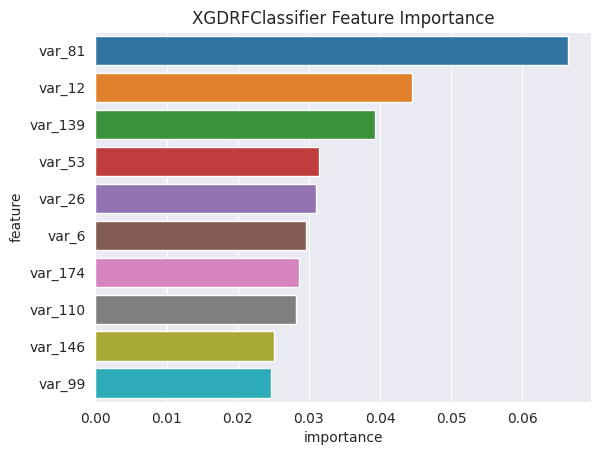

In [92]:
plt.title('XGDRFClassifier Feature Importance')
sns.barplot(data=model03_importance_df.head(10), x='importance', y='feature');

### Make predictions using the XGBRClasiffer.

In [94]:
model04_train_preds = model04.predict(x_train)

In [95]:
model04_train_rmse = mean_squared_error(train_targets, model04_train_preds, squared=False)

In [96]:
model04_val_preds = model04.predict(x_val)

In [97]:
model04_val_rmse = mean_squared_error(val_targets, model04_val_preds, squared=False)

In [98]:
print('Train RMSE: {}, Validation RMSE: {}'.format(model04_train_rmse, model04_val_rmse))

Train RMSE: 0.3107303225199197, Validation RMSE: 0.31881028841616765


### Hyperparameter Tuning
I will be using few parameters such as:

* max_depth
* n_estimators
* max_features
* n_estimators
* max_depth
* subsample
* colsample_bynode
* random_state
* learning rate


In [ ]:
def params_test(**params):
    model = xgb.XGBClassifier(**params).fit(x_train, train_targets)
    train_preds, val_preds = model.predict(x_train), model.predict(x_val)
    train_rmse = mean_squared_error(model.predict(x_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_targets, squared=False)
    return f"train_mean_error is {train_rmse} and val_mean_error is {val_rmse}"

In [ ]:
params_test(n_estimators = 500)

'train_mean_error is 0.01064581294844754 and val_mean_error is 0.2928822288907266'

In [ ]:
params_test(max_depth = 6)

'train_mean_error is 0.19768662069042506 and val_mean_error is 0.2973550066839299'

In [ ]:
params_test(subsample = 0.95)

'train_mean_error is 0.1970786644972002 and val_mean_error is 0.29809394492340835'

In [ ]:
params_test(colsample_bynode=0.2)

'train_mean_error is 0.21430507849014374 and val_mean_error is 0.2952287248897031'

In [ ]:
params_test(random_state=42)

'train_mean_error is 0.19768662069042506 and val_mean_error is 0.2973550066839299'

In [ ]:
params_test(learning_rate=0.6)

'train_mean_error is 0.13537601954063602 and val_mean_error is 0.3100967590930289'

### Training the Model with the best Hyperparameters

In [126]:
model04 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.2, colsample_bytree=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',num_class=3,
              n_estimators=500,n_jobs=-1,objective='multi:softprob',
              random_state=42,reg_lambda=1,subsample=0.95,
              tree_method='exact', validate_parameters=1)

In [127]:
model04.fit(x_train, train_targets)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.2, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=6, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_class=3, ...)

In [128]:
model044_train_preds = model04.predict(x_train)
model044_train_rmse = mean_squared_error(train_targets, model03_train_preds, squared=False)
model044_val_preds = model04.predict(x_val)
model044_val_rmse = mean_squared_error(val_targets, model04_val_preds, squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(model044_train_rmse, model044_val_rmse))

Train RMSE: 0.3085125605222582, Validation RMSE: 0.31881028841616765


In [132]:
#accuracy_train_model044 = model04.score(x_train,train_targets)
##print(' The accuracy for training set by tree is %.2f%% and \n for validation set is %.2f%%'.format(accuracy_train_model044.mean()*100,accuracy_val_model044.mean()*100))

### lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll

In [133]:
LogisticRegression = {'train_rmse(before_tuning)' : model_train_rmse,
       'val_rmse(before_tuning)' : model_val_rmse,
        'train_rmse(after_tuning)' : model0_train_rmse,
       'val_rmse(after_tuning)' : model0_val_rmse}

DecisionTreeClassifier = {'train_rmse(before_tuning)' : model1_train_rmse,
       'val_rmse(before_tuning)' : model1_val_rmse,
        'train_rmse(after_tuning)' : model11_train_rmse,
       'val_rmse(after_tuning)' : model11_val_rmse}

RandomForestClassifier = {'train_rmse(before_tuning)' : model02_train_rmse,
       'val_rmse(before_tuning)' : model02_val_rmse,
        'train_rmse(after_tuning)' : model022_train_rmse,
       'val_rmse(after_tuning)' : model022_val_rmse}

GradientBoostingClassifier = {'train_rmse(before_tuning)' : model03_train_rmse,
       'val_rmse(before_tuning)' : model03_val_rmse,
        'train_rmse(after_tuning)' : model033_train_rmse,
       'val_rmse(after_tuning)' : model033_val_rmse}

XGBRFClassifier = {'train_rmse(before_tuning)' : model04_train_rmse,
       'val_rmse(before_tuning)' : model04_val_rmse,
        'train_rmse(after_tuning)' : model044_train_rmse,
       'val_rmse(after_tuning)' : model044_val_rmse}



In [134]:
# data frame with the erroe values for both the models.

sumary_prediction = pd.DataFrame([LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier,  XGBRFClassifier ], index = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'XGBRFClassifier' ])
sumary_prediction

,train_rmse(before_tuning),val_rmse(before_tuning),train_rmse(after_tuning),val_rmse(after_tuning)
LogisticRegression,0.291753,0.294686,0.291650,0.294822
DecisionTreeClassifier,0.000000,0.409317,0.312517,0.321030
RandomForestClassifier,0.002582,0.319937,0.002582,0.319937
GradientBoostingClassifier,0.308513,0.315658,0.308513,0.315658
XGBRFClassifier,0.310730,0.318810,0.308513,0.318810


### Making Predictions on the Test Set

In [135]:
test_bank_df.head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [136]:
test_preds = model.predict(test_inputs)

In [137]:
test_input_cols = list(test_bank_df.columns)[2:-1]

In [139]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
sub_df

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [140]:
def predict_and_submit(model, test_inputs, target):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['target'] = test_preds
    sub_df.to_csv(target, index=None)
    return sub_df

In [142]:
predict_and_submit(model, test_inputs, 'LogisticRegression_ model_submission.csv')
_

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0
